# EDA Project: Amazon Product Sales Analysis

## What is this project about?
This project focuses on exploring an Amazon sales dataset to understand the factors that drive product popularity and pricing. We aim to analyze how discounts, ratings, and categories interact to influence consumer behavior.

### Why EDA?
* To understand the data structure: Checking column types and missing information.
* To detect patterns and outliers: Identifying extreme price points and top-performing categories.
* To extract meaningful insights: Finding correlations between discount percentages and customer satisfaction

### 1. Product & Pricing Columns
| Column Name | Meaning | Importance |
| :--- | :--- | :--- |
| product_id | Unique ID for each product | Prevents duplicates and tracks items. |
| product_name | Full title of the product | Used for identification and keyword search. |
| category | Product classification | Essential for group-wise analysis. |
| discounted_price| Price after discount | Key for revenue and actual sales calculation. |
| actual_price | Original retail price | Used to find the total discount value. |
| discount_percentage| Percentage of price cut | Analyzes the impact of discounts on sales. |

### 2. Ratings 
| Column Name | Meaning | Importance |
| :--- | :--- | :--- |
| rating | Average customer score | Indicates quality and satisfaction. |
| rating_count | Total number of ratings | Shows the reliability of the score. |
| about_product | Product description | Useful for finding specific features. |

### 3. Users & Review Data
| Column Name | Meaning | Importance |
| :--- | :--- | :--- |
| user_id | Unique ID for the customer | Helps identify repeat buyers. |
| user_name | Name of the customer | Identifies top reviewers. |
| review_id | Unique ID for the review | Tracks individual feedback. |
| review_title | Summary of the review | Gives a quick sentiment idea. |
| review_content | Full text of the review | Critical for Sentiment Analysis. |

### 4. Media & Links
| Column Name | Meaning | Importance |
| :--- | :--- | :--- |
| img_link | URL of the product image | Used for visual inspection. |
| product_link | URL of the live page | References the original Amazon page. |

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df = pd.read_csv('data/amazon.csv')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the meas

## features


In [8]:
df.shape

(1465, 16)

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   product_id           1465 non-null   str  
 1   product_name         1465 non-null   str  
 2   category             1465 non-null   str  
 3   discounted_price     1465 non-null   str  
 4   actual_price         1465 non-null   str  
 5   discount_percentage  1465 non-null   str  
 6   rating               1465 non-null   str  
 7   rating_count         1463 non-null   str  
 8   about_product        1465 non-null   str  
 9   user_id              1465 non-null   str  
 10  user_name            1465 non-null   str  
 11  review_id            1465 non-null   str  
 12  review_title         1465 non-null   str  
 13  review_content       1465 non-null   str  
 14  img_link             1465 non-null   str  
 15  product_link         1465 non-null   str  
dtypes: str(16)
memory usage: 183.3 KB


 Note: all columns are string that will prevent us from performaing statistical analysis or detecting outliers

## Data cleaning

In [ ]:
##df['discounted_price']=df['discounted_price'].astype(str)

In [9]:
df['discounted_price']=df['discounted_price'].str.replace('₹','').str.replace(',','')
df['discounted_price']=df['discounted_price'].astype(float)

In [10]:
df['actual_price']=df['actual_price'].astype(str)

In [14]:
df['actual_price']=df['actual_price'].str.replace('₹','').str.replace(',','')
df['actual_price']=df['actual_price'].astype(float)

In [12]:
count=df['actual_price'].str.contains('-').sum()
print(count)

4


In [13]:
df=df[~df['actual_price'].str.contains('-')]

In [15]:
df['discount_percentage']=df['discount_percentage'].str.replace('%','')
df['discount_percentage']=df['discount_percentage'].astype(float)/100


In [16]:
df['rating_count']=df['rating_count'].str.replace(',','')
df['rating_count']=df['rating_count'].astype(float)/100


In [17]:
df['rating']= pd.to_numeric(df['rating'],errors='coerce')

In [18]:
df['rating'].isna().sum()

np.int64(2)

In [19]:
df=df.dropna(subset=['rating'])

In [20]:
df.dtypes

product_id                 str
product_name               str
category                   str
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product              str
user_id                    str
user_name                  str
review_id                  str
review_title               str
review_content             str
img_link                   str
product_link               str
dtype: object

## Data Cleaning & Type Conversion
In this step, we addressed the data type issues identified earlier. Since the core columns for analysis (prices and ratings) were imported as strings, they have been converted to numeric formats.

### Actions Taken:
* Cleaning Currency Symbols: Removed symbols like ₹ and commas from discounted_price and actual_price.
* Handling Special Characters: Cleaned the rating column to ensure it contains only numeric values.
* Type Conversion: Converted the following columns from object (string) to float:
    1. discounted_price
    2. actual_price
    3. discount_percentage
    4. rating
    5. rating_count

Result: The dataset is now ready for descriptive statistics, correlation analysis, and outlier detection.

In [21]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,242.69,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,439.94,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,79.28,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,943.63,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,169.05,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [22]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000
mean,3135.912563,5463.896696,0.477197,4.101645,183.611469
std,6956.458900,10893.054833,0.216300,0.331638,428.292786
min,39.000000,39.000000,0.000000,2.000000,0.020000
25%,325.000000,825.000000,0.320000,4.000000,11.930000
50%,799.000000,1690.000000,0.500000,4.100000,51.950000
75%,1999.000000,4331.480000,0.630000,4.300000,173.940000
max,77990.000000,139900.000000,0.940000,9.600000,4269.730000


In [ ]:

string_columns = df.select_dtypes(include=['object']).columns
for col in string_columns:
    df[col] = df[col].str.strip()

C:\Users\Sameh\AppData\Local\Temp\ipykernel_9364\2644238989.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  string_columns = df.select_dtypes(include=['object']).columns


In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.duplicated(subset=['product_id']).sum()

np.int64(114)

In [ ]:
df.duplicated(subset=['product_name']).sum()

np.int64(128)

###  insights on Data Duplication
Although the check for identical rows returned zero duplicates (df.duplicated().sum() == 0), we observed that some Product Names appear multiple times in the dataset

Possible Reasons for other columns frequency:
1. Different Sellers: The same product might be sold by multiple sellers each with a different product_id or price
2. Multiple Categories: A product could be listed under different sub-categories (e.g., "Electronics" and "Home Office").
3. Price Fluctuations: The same product might be recorded at different times with slight variations in discounted_price or actual_price
4. Variations in Ratings: Different entries for the same product may have different rating_count or review_content based on when the data was scraped

Conclusion: Since each row has at least one unique attribute (like a unique product_id or different review data), they are not considered "duplicate rows", but they represent the same physical product

# Missing Values

In [ ]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [25]:
df=df.dropna(subset=['rating','rating_count'])

the very low number of missing values indicates that the dataset was collected with high efficiency

In [26]:

invalid_prices = df[df['discounted_price'] > df['actual_price']]
print(f"number of invalid prices {len(invalid_prices)}")


#df = df[df['discounted_price'] <= df['actual_price']]

number of invalid prices 0


there is no invalid prices that confirms the accuracy of the dataset

### Descriptive Statistics

1) Summary Statistics

In [27]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='str')

In [28]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,3139.909698,5470.025587,0.476788,4.101784,183.611469
std,6960.397205,10899.275893,0.216165,0.329768,428.292786
min,39.000000,39.000000,0.000000,2.000000,0.020000
25%,326.000000,825.000000,0.320000,4.000000,11.930000
50%,799.000000,1695.000000,0.500000,4.100000,51.950000
75%,1999.000000,4332.960000,0.630000,4.300000,173.940000
max,77990.000000,139900.000000,0.940000,9.600000,4269.730000


In [29]:
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### Insights about pricing :
prices mean = 5463  
prices std  = 10893  
* actual_price has right skew  
* prices are very spread out
* Some items are extremely expensive

### Insights about discount_percentage :

* discount_percentage is balanced  
* no items have a huge discount than other

### Insights about rating :



In [30]:
df['rating'].median()

np.float64(4.1)

In [31]:
df['rating'].skew()

np.float64(2.6001254814349717)

rating mean = 4.1    
median      = 4.1  
std         = 0.3    
* most ratings are close to 4 , means most peole give simmilar rating
min = 2  
max = 9  
* most ratings are around 4 , with some low and high extremes

### Insights about rating count :



In [ ]:
#number of products
df['product_name'].count()

np.int64(1459)

In [ ]:
# number of ratings
df['rating_count'].count()

np.int64(1457)

In [ ]:
df['rating_count'].median()

np.float64(51.95)

1) all the products have been rated from coustmers , excecpt 2 products  

2) mean = 183  
  median = 51  
  std = 428  
   means that ther's some products have very high number of ratings , may reflect:  
    - high popularity 
    - high number of selling of this product  
    - sign to best sellers products

# Products outliers

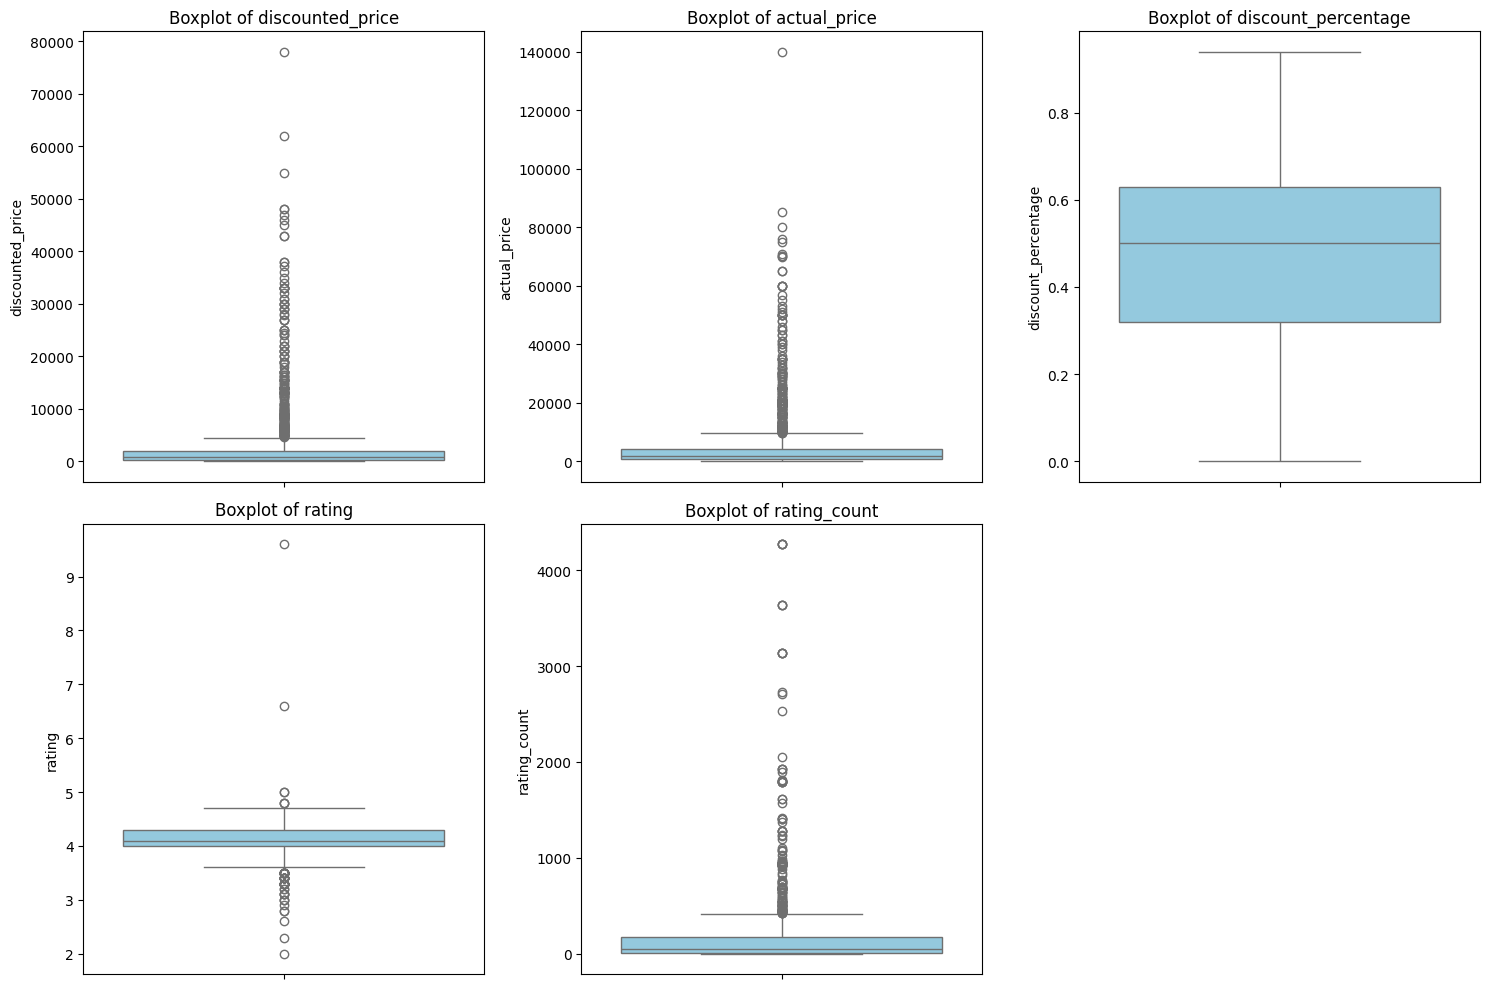

C:\Users\Dell\AppData\Local\Temp\temp\ipykernel_18964\2085272808.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['category'], order=df['category'].value_counts().iloc[:10].index, palette='viridis')


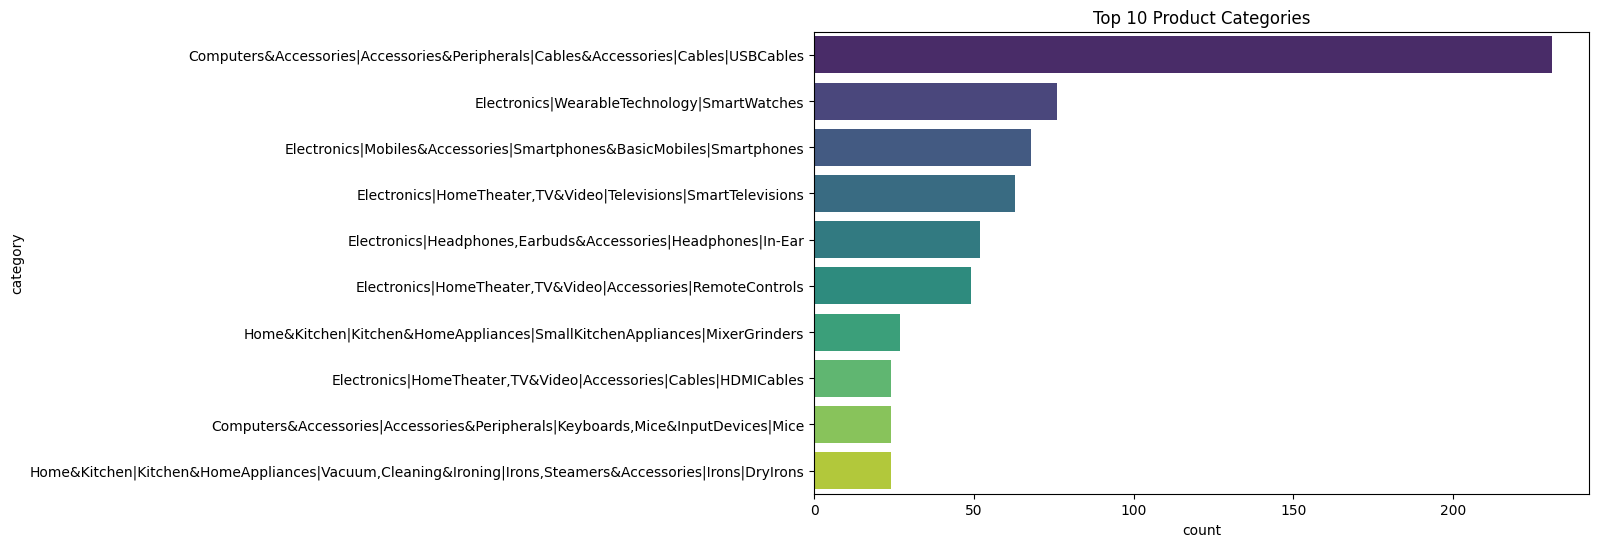

In [ ]:

#boxplot

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i) # تقسيم الشاشة لعدة رسومات
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# count plot
if 'category' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df['category'], order=df['category'].value_counts().iloc[:10].index, palette='viridis')
    plt.title('Top 10 Product Categories')
    plt.show()

## 📊 Data Visualization Analysis
# 1. Outlier Analysis (Boxplots)
The boxplots provide a visual representation of the data distribution and help identify statistical outliers.

A- Discounted & Actual Price: Both columns show a significant number of outliers on the upper side. This indicates that the most products are reasonably priced, there is a small group of high-value luxury items (like laptops) that cost much more than the average.

B- Discount Percentage: The distribution is relatively balanced without extreme outliers. This suggests that Amazon applies discounts across a consistent range for most products in this dataset

C- Rating: Most ratings are concentrated between 4.0 and 4.5. The outliers appear at the lower end, identifying specific products with exceptionally poor customer feedback compared to the general high satisfaction level.

D- Rating Count: This column exhibits the most extreme outliers. A few "blockbuster" products have a massive number of reviews (reaching hundreds of thousands), while the vast majority of products have a much smaller, modest count

# 2. outliers Analysis (Category Countplot)
The horizontal bar chart reveals the composition of the product catalog.

Dominant Category: The "Computers & Accessories | Cables & Accessories" category is the clear market leader in terms of product frequency, appearing far more often than any other group.

Electronics Focus: The top 5 categories are heavily dominated by electronics, including Smartwatches, Smartphones, and Smart Televisions.

Household Presence: Home appliances like Mixer Grinders and Dry Irons represent a smaller but significant portion of the top 10 list.
## insights
Data Validity: The pricing outliers are accurete and reflect real market variety

Customer Behavior: Customers tend to give high ratings (above 4.0) for most products, but they are very active in reviewing "Cables & Accessories"


In [32]:

Q1 = df['rating_count'].quantile(0.25)
Q3= df['rating_count'].quantile(0.75)
IQR = Q3-Q1
extreme_products = df[df['rating_count'] > Q3 + 1.5*IQR]
extreme_products[['product_name' , 'rating_count']].sort_values('rating_count' , ascending = False)
extreme_products

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,439.94,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,943.63,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
8,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Computers&Accessories|NetworkingDevices|Networ...,499.0,999.0,0.50,4.2,1796.91,USB WiFi Adapter —— Speedy wireless transmissi...,"AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...","Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...","R1LW6NWSVTVZ2H,R3VR5WFKUS15C5,R2F6GC79OYWUKQ,R...",Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/TP-Link-TL-WN725N-150Mbp...
9,B082LZGK39,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,299.0,0.33,4.0,439.94,Universal Compatibility – It is compatible wit...,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
11,B0789LZTCJ,boAt Rugged v3 Extra Tough Unbreakable Braided...,Computers&Accessories|Accessories&Peripherals|...,299.0,799.0,0.63,4.2,943.63,The boAt rugged cable features our special tou...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41SDfuK7L2...,https://www.amazon.in/Rugged-Extra-Tough-Unbre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,B01GFTEV5Y,Pigeon by Stovekraft Cruise 1800 watt Inductio...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,1699.0,3193.0,0.47,3.8,540.32,Pigeon Cruise Induction Cooktop Comes with 7 s...,"AFVYGOA4AWO77UIPMUNH6YSKSB5A,AEJMVHQ4LOSVJQ5BO...","Amazon P.,Snt,Rajesh,Soniya singh,Md Ramiz Raj...","RRHMKA6B4XPL7,RY4GOMU0VCJ6I,R2UUJP85K7YKSM,ROS...",It helps to know about what it can and can't d...,If you are buying this as a secondary cooking ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Pigeon-Stovekraft-Cruise...
1045,B09X5C9VLK,Lifelong LLMG23 Power Pro 500-Watt Mixer Grind...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,1299.0,3500.0,0.63,3.8,440.50,"3 jars liquidizing jar (1.5 liters), dry or we...","AFHU7KCA3ZL6XOL3PYSGYJM4LAZA,AESFKEVRHPM6BNLUQ...","shardendu dwivedi,JAYDEB BANERJEE,santosh,Prac...","R13NH1L2MEEDOH,R2EJHR16R59BAG,R3HAH8XOGKHIXW,R...","Overall satisfactory in this price range,Nothi...","Overall satisfactory in 

# Catogery outliers

In [34]:
# highest catogries in ratingcount
extreme_categories = extreme_products['category'].value_counts()
extreme_categories

category
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                             26
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        24
Electronics|Accessories|MemoryCards|MicroSD                                                              10
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                     10
Electronics|WearableTechnology|SmartWatches                                                               9
Electronics|Headphones,Earbuds&Accessories|Headphones|On-Ear                                              6
Computers&Accessories|ExternalDevices&DataStorage|PenDrives                                               6
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                            5
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             4
Electronics|Mobiles

In [ ]:
# display the highest products in highst category 
extreme_products [ extreme_products['category'] == 'Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear' ]
extreme_products [ ['product_id' ,'product_name' , 'discount_percentage', 'discounted_price' ] ]

,product_id,product_name,discount_percentage,discounted_price
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,0.43,199.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,0.53,329.0
8,B008IFXQFU,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",0.50,499.0
9,B082LZGK39,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,0.33,199.0
11,B0789LZTCJ,boAt Rugged v3 Extra Tough Unbreakable Braided...,0.63,299.0
...,...,...,...,...
1032,B01GFTEV5Y,Pigeon by Stovekraft Cruise 1800 watt Inductio...,0.47,1699.0
1045,B09X5C9VLK,Lifelong LLMG23 Power Pro 500-Watt Mixer Grind...,0.63,1299.0
1077,B008YW8M0G,Bajaj DX-7 1000W Dry Iron with Advance Solepla...,0.11,775.0
1130,B0756K5DYZ,Prestige Iris 750 Watt Mixer Grinder with 3 St...,0.48,3249.0


In [ ]:
# display the highest products in highest category sorted by discount_percentage
filtered = extreme_products [ extreme_products['category'] == 'Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear' ].sort_values('discount_percentage' , ascending= False)
filtered[['product_id' ,'product_name' , 'discount_percentage' , 'rating_count']]


,product_id,product_name,discount_percentage,rating_count
720,B086WMSCN3,boAt Airdopes 171 in Ear Bluetooth True Wirele...,0.80,475.21
656,B07LG59NPV,Boult Audio Probass Curve Bluetooth Wireless i...,0.80,1030.52
349,B08D77XZX5,PTron Tangentbeat in-Ear Bluetooth 5.0 Wireles...,0.76,581.62
912,B08MTLLSL8,boAt Bassheads 102 Wired in Ear Earphones with...,0.69,760.42
639,B08H9Z3XQW,boAt Bassheads 242 in Ear Wired Earphones with...,0.69,1616.77
609,B07TCN5VR9,Boult Audio BassBuds X1 in-Ear Wired Earphones...,0.67,770.27
415,B085W8CFLH,PTron Tangent Lite Bluetooth 5.0 Earphones wit...,0.67,839.96
585,B09N3ZNHTY,boAt Airdopes 141 Bluetooth Truly Wireless in ...,0.67,1369.54
618,B07KY3FNQP,boAt Bassheads 152 in Ear Wired Earphones with...,0.65,917.70
595,B08TV2P1N8,boAt Rockerz 255 Pro+ in-Ear Bluetooth Neckban...,0.65,1418.41


# Relation between discount_percentage and rating_count

In [1]:
import matplotlib.pyplot as plt
plt.xlabel = plt.matplotlib.pyplot.xlabel
plt.ylabel = plt.matplotlib.pyplot.ylabel
plt.title = plt.matplotlib.pyplot.title

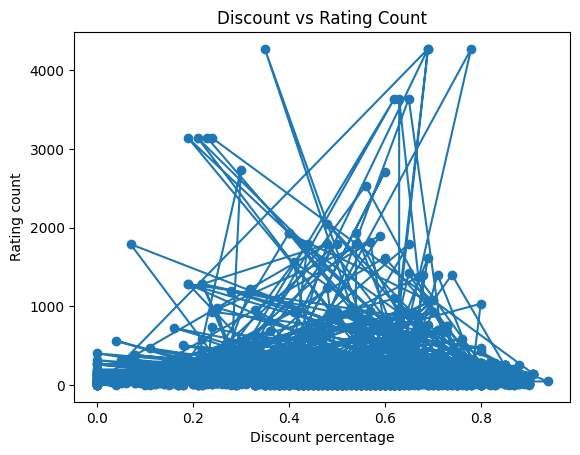

In [39]:
plt.plot(df['discount_percentage'], df['rating_count'], marker='o')
plt.xlabel('Discount percentage')
plt.ylabel('Rating count')
plt.title('Discount vs Rating Count')
plt.show()

# Top 10 products

In [48]:
df['popularity_score'] = (df['rating']*df['rating_count']/100).round(2)


In [49]:
top_10_products = df.sort_values(['popularity_score'], ascending = False).head(10)
top_10_products[['product_id' ,'product_name' ,'category','popularity_score']]

,product_id,product_name,category,popularity_score
47,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","Electronics|HomeTheater,TV&Video|Accessories|C...",187.87
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",187.87
684,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",187.87
65,B014I8SX4Y,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","Electronics|HomeTheater,TV&Video|Accessories|C...",187.87
400,B07GQD4K6L,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",149.12
584,B071Z8M4KX,boAt BassHeads 100 in-Ear Wired Headphones wit...,"Electronics|Headphones,Earbuds&Accessories|Hea...",149.12
352,B07GPXXNNG,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",149.12
371,B09GFLXVH9,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",Electronics|Mobiles&Accessories|Smartphones&Ba...,128.67
566,B09GFPN6TP,"Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...",Electronics|Mobiles&Accessories|Smartphones&Ba...,128.67
370,B09GFPVD9Y,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",Electronics|Mobiles&Accessories|Smartphones&Ba...,128.67


C:\Users\Dell\AppData\Local\Temp\temp\ipykernel_18964\692683669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x='popularity_score', y='product_name', palette='magma')


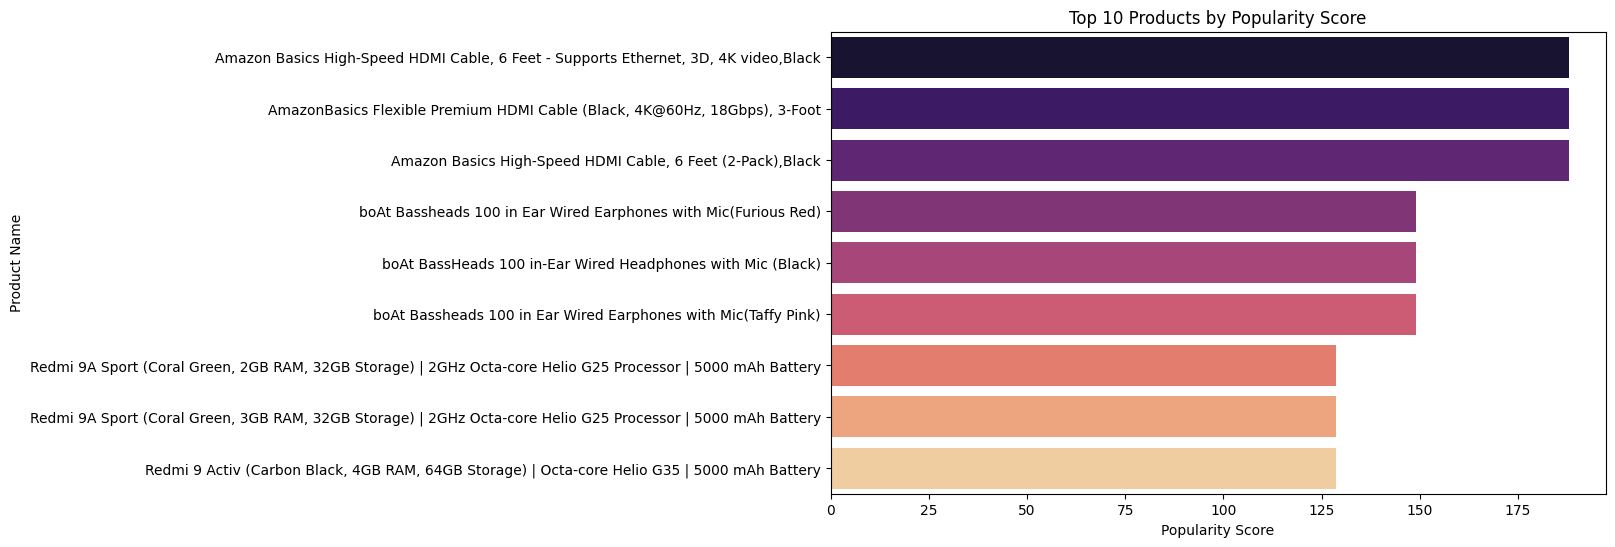

In [50]:
# visualization Top 10 Popular Products
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_products, x='popularity_score', y='product_name', palette='magma')
plt.title('Top 10 Products by Popularity Score')
plt.xlabel('Popularity Score')
plt.ylabel('Product Name')
plt.show()

# Why this plot?

 To rank products based on a combined metric of quality (Rating) and volume (Rating Count).

 # insights for busness
 
   The business can use these specific products in marketing campaigns or "Frequently Bought Together" sections because they are already proven winners.

In [ ]:
# Identifying Low-Rated Products
low_rated_products = df[df['rating'] < 3.0].sort_values('rating', ascending=True)
low_rated_products[['product_name', 'category', 'rating', 'rating_count', 'actual_price']]

,product_name,category,rating,rating_count,actual_price
1309,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2.0,0.02,2495.0
1243,"Personal Size Blender, Portable Blender, Batte...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2.3,0.13,1499.0
1356,Green Tales Heat Seal Mini Food Sealer-Impulse...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2.6,0.24,300.0
545,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics|WearableTechnology|SmartWatches,2.8,0.87,1999.0
1286,MR. BRAND Portable USB Juicer Electric USB Jui...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2.8,1.09,2199.0
1449,IONIX Tap filter Multilayer | Activated Carbon...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,2.9,1.59,699.0


C:\Users\Dell\AppData\Local\Temp\temp\ipykernel_18964\3128910599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low_rated_products, x='rating', y='product_name', palette='Reds_r')


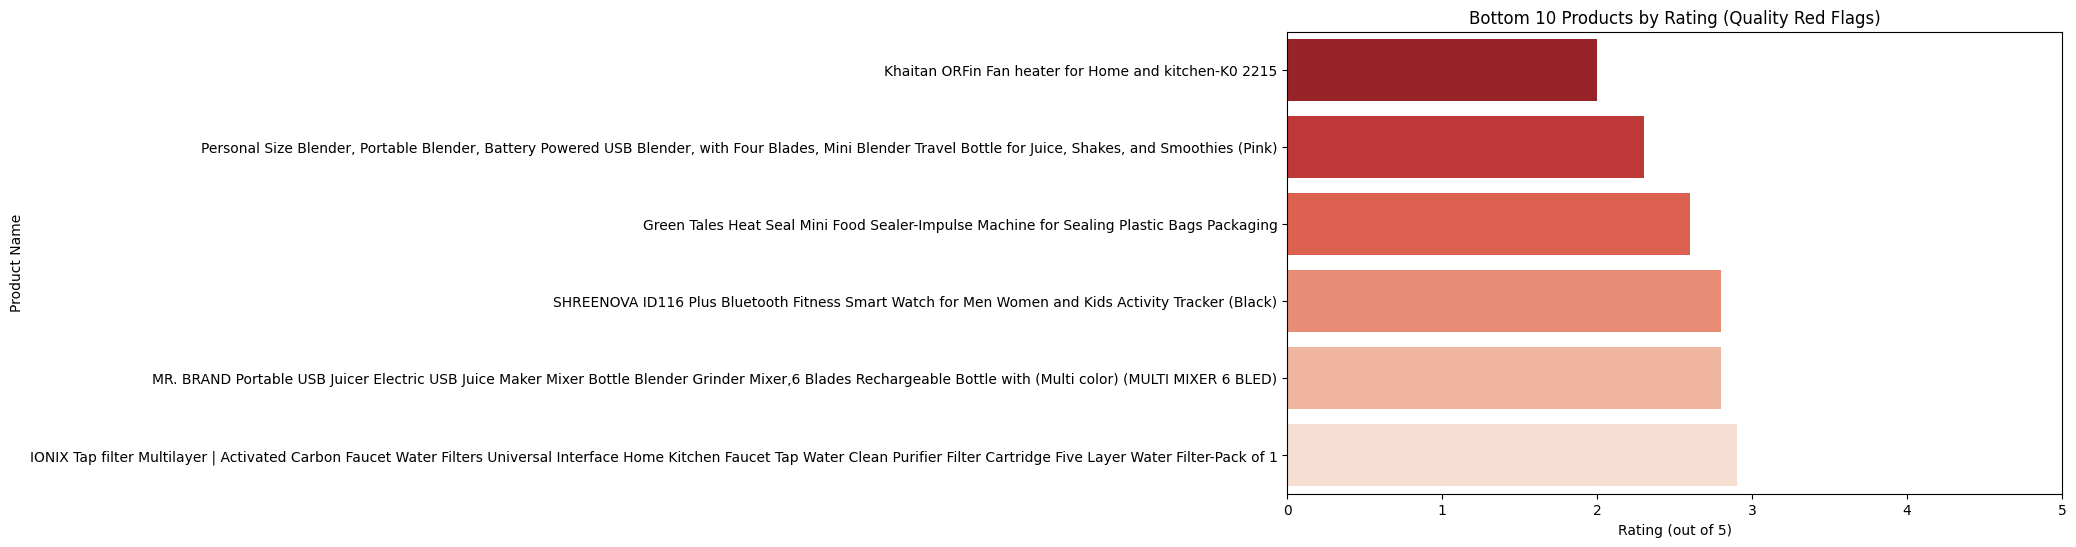

In [51]:

plt.figure(figsize=(10, 6))
sns.barplot(data=low_rated_products, x='rating', y='product_name', palette='Reds_r')
plt.title('Bottom 10 Products by Rating (Quality Red Flags)')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Product Name')
plt.xlim(0,5)
plt.show()

# Why this plot?
To visually isolate the products with the lowest customer satisfaction scores.
A bar chart makes it easy to compare exactly how  these items are performing relative to the platform's average.

# insights for busniess

Quality Assurance: These products (like the Khaitan Fan Heater) are "Red Flags" that may need to be delisted to protect the platform's reputation.

Supplier Vetting: If multiple low-rated products come from the same category (e.g., Home & Kitchen), the business should re-evaluate the suppliers in that segment.

Customer Trust: Identifying and fixing these outliers ensures that the "Amazon Choice" or "Best Seller" labels remain trustworthy for shoppers.

## Heat Map

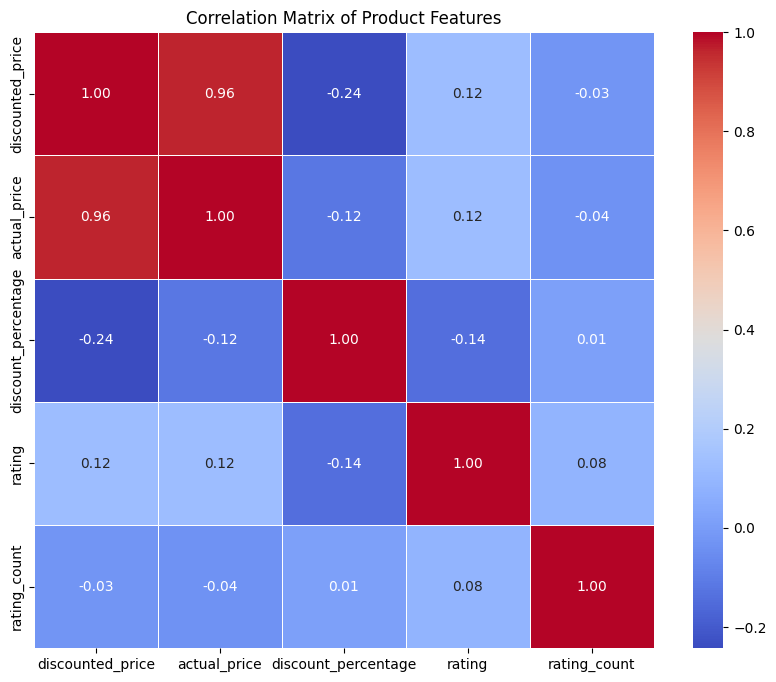

In [41]:


# Selecting numeric columns for correlation
corr_matrix = df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].corr()

# Plotting the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Product Features')
plt.show()

### 📊 Correlation Matrix Insights

The Heatmap reveals how different product features interact within the Amazon marketplace:

* Price Consistency (0.96): There is a near-perfect positive correlation between actual_price and discounted_price, confirming that high-value items remain relatively expensive even after discounts.
* Discount Impact (-0.24): A negative correlation exists between discount_percentage and discounted_price. This suggests that aggressive discounting is more common among lower-priced goods.
* Independence of Rating (0.08): The very weak correlation between rating and rating_count indicates that a high star rating does not necessarily drive higher sales volume (rating count), and vice-versa. Popularity and perceived quality are independent factors in this dataset.
* Rating vs. Price (0.12): A slight positive correlation suggests that customers might perceive slightly more expensive items as having marginally better quality, though the impact is minimal.

# Price Vs Discount analysis

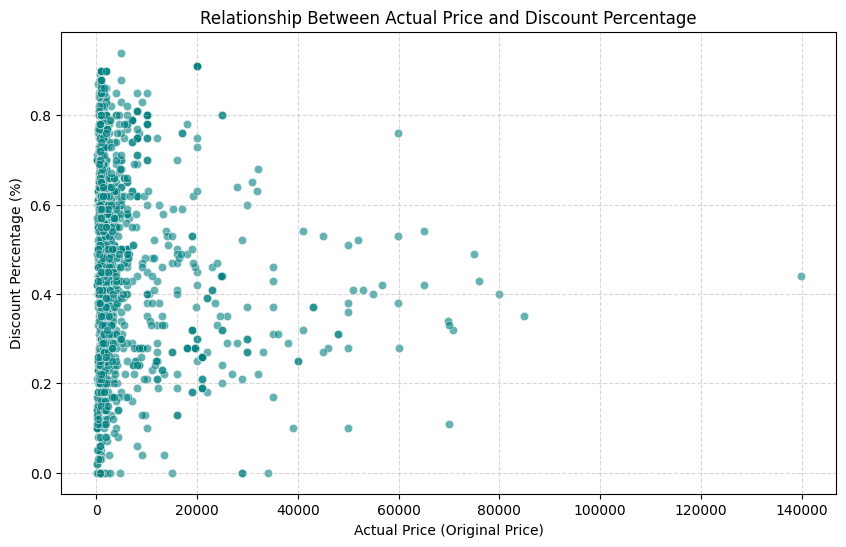

In [52]:

# Price vs Discount Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='actual_price', y='discount_percentage', alpha=0.6, color='teal')

plt.title('Relationship Between Actual Price and Discount Percentage')
plt.xlabel('Actual Price (Original Price)')
plt.ylabel('Discount Percentage (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# why this plot?

To investigate the correlation between the original value of a product and the aggressiveness of the discount offered.

A Scatter Plot helps us see the "Density" of discounts across different price points.

# Insights:
Discount Density: The majority of products are concentrated in the lower price range (under 20,000) and feature a wide variety of discounts, often reaching up to 80-90%.

Premium Product Stability: As the actual_price increases (moving towards 140,000), the discount percentages become more moderate, typically staying below 50%. This confirms our earlier correlation finding (-0.12) that high-end electronics maintain more stable pricing.

Market Strategy: Amazon seems to use "Deep Discounts" primarily on high-volumelow-cost accessories 

# most reviewed products

In [59]:
most_reviewed=df.sort_values('rating_count',ascending=False).head(10)
most_reviewed

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,popularity_score
47,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","Electronics|HomeTheater,TV&Video|Accessories|C...",309.0,475.0,0.35,4.4,4269.73,Please select appropriate display resolution &...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41bCxnHksn...,https://www.amazon.in/AmazonBasics-High-Speed-...,187.87
65,B014I8SX4Y,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","Electronics|HomeTheater,TV&Video|Accessories|C...",309.0,1400.0,0.78,4.4,4269.73,HDMI A Male to A Male Cable: Supports Ethernet...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41eJqkFjCR...,https://www.amazon.in/AmazonBasics-High-Speed-...,187.87
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",219.0,700.0,0.69,4.4,4269.73,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...,187.87
684,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",219.0,700.0,0.69,4.4,4269.72,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...,187.87
400,B07GQD4K6L,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",379.0,999.0,0.62,4.1,3637.13,The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31qVddHyy5...,https://www.amazon.in/Boat-BassHeads-100-Inspi...,149.12
352,B07GPXXNNG,boAt Bassheads 100 in Ear Wired Earphones with...,"Electronics|Headphones,Earbuds&Accessories|Hea...",349.0,999.0,0.65,4.1,3637.13,The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,https://m.media-amazon.com/images/I/31J6I7SrLX...,https://www.amazon.in/Boat-BassHeads-100-Inspi...,149.12
584,B071Z8M4KX,boAt BassHeads 100 in-Ear Wired Headphones wit...,"Electronics|Headphones,Earbuds&Accessories|Hea...",365.0,999.0,0.63,4.1,3637.11,The perfect way to add some style and stand ou...,"AF4MVO4JNFDEPWFKZO62OAJKRIWA,AHVPAXEWPATRASBKH...","tarun kumar,mahesh radheshyam tawari,Blackspad...","R2DD2M5YARW7R2,R2M9ZYNGGV1ZLN,RNWNTRNLSJWSB,R3...","Best value for money,HEAD PHONE POUCH NOT RECE...",The sound q

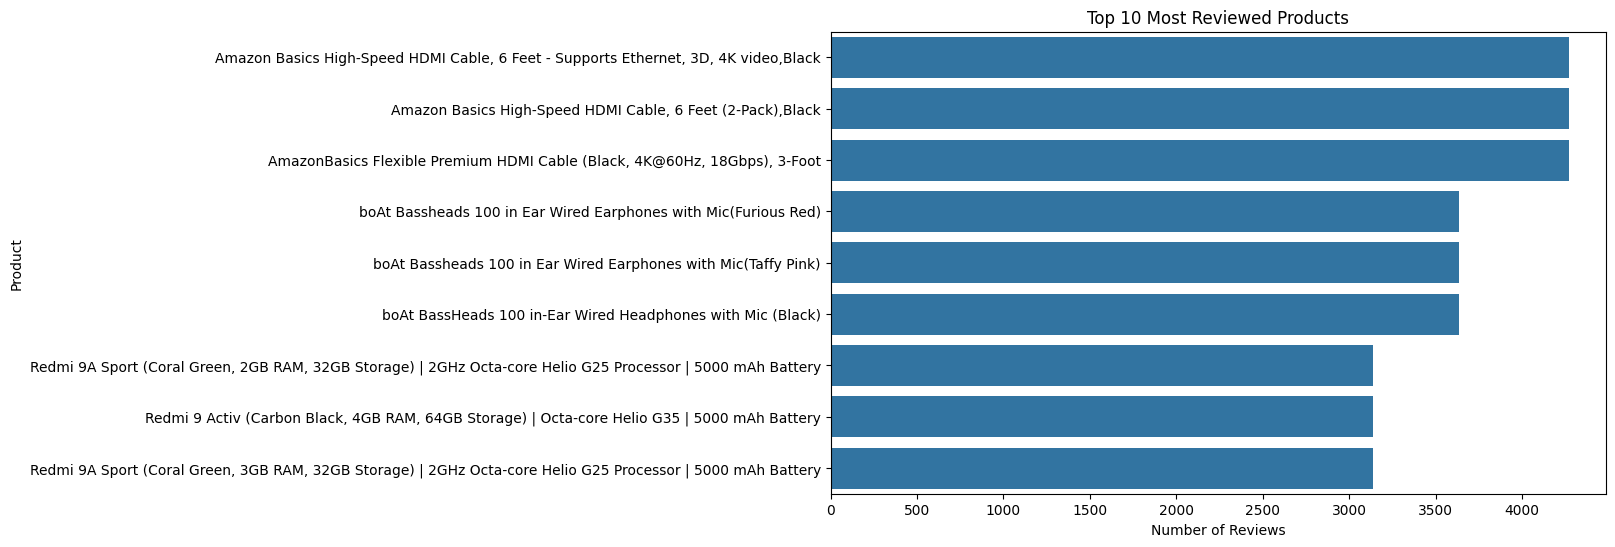

In [60]:

plt.figure(figsize=(10,6))
sns.barplot(
    x='rating_count',
    y='product_name',
    data=most_reviewed
)

plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Number of Reviews")
plt.ylabel("Product")

plt.show()

# Distribution of Ratings

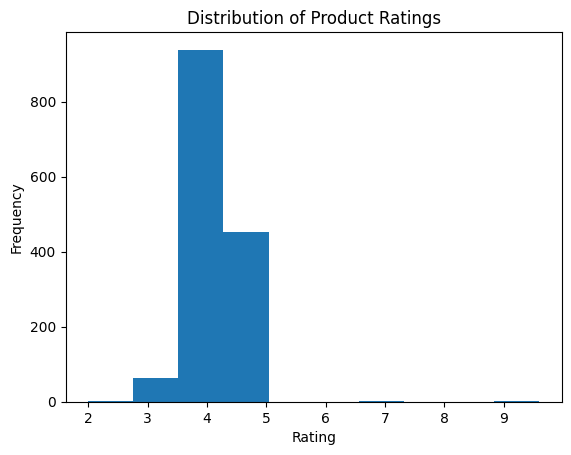

In [63]:
plt.hist(df['rating'],bins=10)

plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.show()

# insights

most products are rated four or five 

very few products have ratings below 3

this indicates that most products on amazon receive positive feedback from customers

# Does discount affect product ratings?

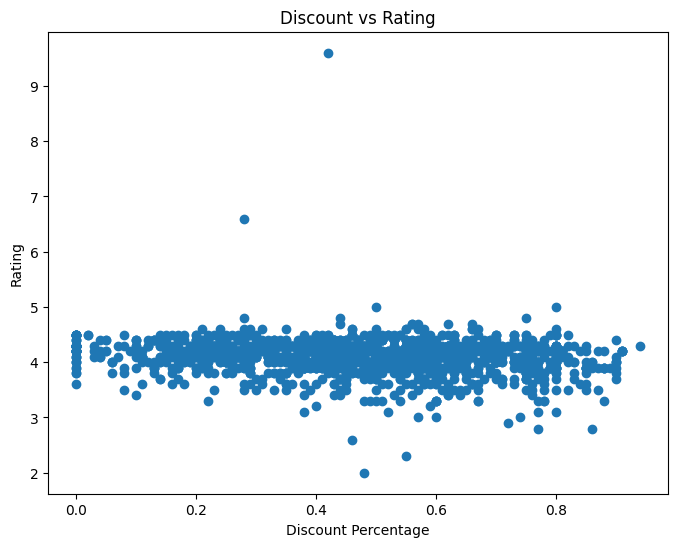

In [64]:
plt.figure(figsize=(8,6))

plt.scatter(df['discount_percentage'], df['rating'])

plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
plt.title("Discount vs Rating")

plt.show()

# insights
Whether the discount is 0% or 90%, the ratings mostly stay clustered between 4.0 and 4.5.

 This shows that customers are objective they rate the product based on its performance and quality, not just because they got it at a cheap price.
 
 This matches our Correlation Matrix, which showed a very weak connection (-0.14) between these two variables.


# which categories have the highest average ratings?




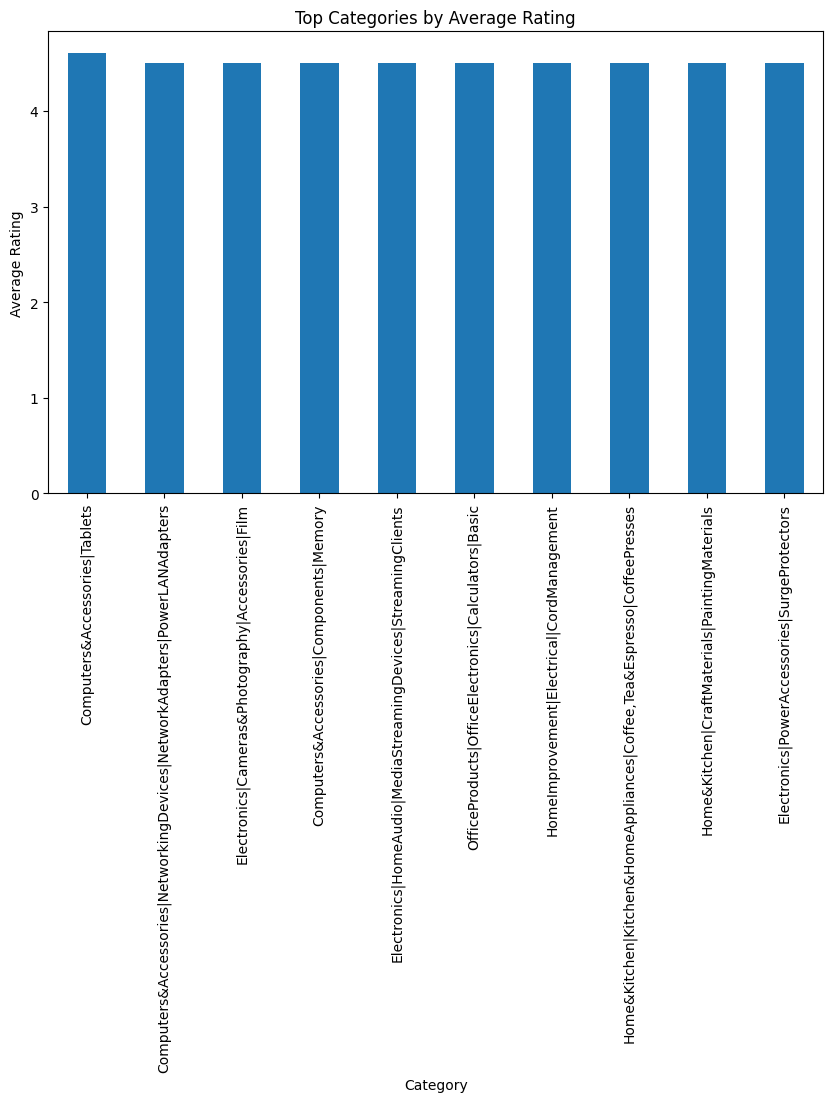

In [65]:
category_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
category_rating.plot(kind='bar')

plt.title("Top Categories by Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating")

plt.show()

# insights 
The Tablets category (under Computers & Accessories) leads the platform with the highest average rating, followed closely by specialized networking and film accessories.

 There is a remarkable consistency in quality across these top categories, with all of them maintaining an average rating above 4.5.

 Success isn't limited to tech categories like Coffee Presses (Home & Kitchen) and Painting Materials are performing just as well as electronics in terms of user satisfaction.